#### Homework2
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. 

Q1 (8 points) Answer the following questions clearly. 
-
- (4 points) Compare the cost functions in Ridge and Lasso Regression and indicate the regularization parameter.
  --
    Ridge Regression
  $$
    \sum_{i=1}^{M}= \sum_{i=1}^{M}\left(y_i - \sum_{j=0}^{N}w_j \times x_{ij}\right)^2 + \lambda \sum_{j=1}^{n} w_j^2
  $$
   The regularization term for ridge regression is the sum of the squares of the coefficients, $\sum_{j=1}^{n} w_j^2$, multiplied by the regularization parameter $\lambda$. This adds a penalty equal to the square of the magnitude of coefficients (times lambda).
  
    Lasso Regression
  $$
   \sum_{i=1}^{M}= \sum_{i=1}^{M}\left(y_i - \sum_{j=0}^{N}w_j \times x_{ij}\right)^2 + \lambda \sum_{j=1}^{n} |w_j|
  $$
   The regularization term for ridge regression is the sum of the absolute values of the coefficients, $\sum_{j=1}^{n} |w_j|$, multiplied by the regularization parameter $\lambda$. This adds a penalty equal to the absolute values of the magnitude of coefficients (times lambda).

- (4 points) Explain which weights are more penalized in Ridge Regression and why (discuss your answer in the context of constraint satisfaction and take into account the constraint on Ridge Regression coefficients).
    --
    Large weights are much more penalized in Ridge Regression, as paramters must meet the following constraint on ridge regression scoefficients: for some $c>0$, $\sum_{j=1}^{n} w_j^2 < c$. Since square a number massively increases its magnitude, large weights are penalized and, overall, weights will be forced to be smaller to prevent overfitting.

Q2 (12 points) In the context of training a linear regression model using Maximum-Likelihood-Estimation, answer the following questions:
-
(4 points) Indicate all assumptions discussed in the lecture under the MLE principle about the data, residual error, and the type of the probability density function used in the Likelihood function.
--
- Residual error is assumed to be normally distributed according to $\epsilon \sim N(0,\sigma^2)$ where $/sigma$ is a constant and $\epsilon$ is independent across observations (and thus variable $y$ is also independent across observations).
- Also assume $x_0 = 1$ (because it is the bias term).
- $x_1, x_2, ... , 𝑥_n$ are the independent variables, and $y$ in the dependent variable.
- Y is normally distributed is equal to $N(g(x), \sigma^2)$ where g(x) is mean and $\sigma^2$ is variance.
- The type of PDF used in the likelihood function is that of a normal distribution, i.e.:
  $$
    pdf(y) = \frac{1}{\sqrt{2\pi\sigma^2}} \times e^{\frac{\left(y-wx\right)^2}{2\sigma^2}}
  $$


(4 points) Indicate the Likelihood function mathematically with respect to the assumptions made under MLE principle, and describe each term/parameters used in the likelihood function.
--
$$
L(w_0, w_1, ..., w_n, \sigma^2 | x,y) = \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} \times e^{\frac{\left(y-wx\right)^2}{2\sigma^2}}
$$
- Terms/parameters in likelihood function: $\theta$ is the set of all weights $w_0, w_1, ..., w_n$ AND the variance $\sigma^2$.
- The variance, $\sigma^2$, is the variance of the errors/residuals in the linear regression model.
- y is the normally distributed target/output variable, and x is the normally distributed input/feature variable.
- The likelihood function represents the joint probability of all independent observed data $x_0, x_1, .., x_n$
- It's the product of the likelihood of observing the data, given the model parameters($w_0, w_1, ..., w_n$)


(4 points) Explain how the concept of maximizing the likelihood of observing data under model parameters is convertible to minimizing the NLL? Discuss in terms of the mathematical notation and the shape of the function. 
--
These two concepts are mathematically equivalent. Why? Because all the NLL does is manipulate the form of the Likelihood function to make it easier to convert. 
Addition is easier to compute than multiplication, and thus, by taking the log of the Likelihood function, we can take advantage of the log property (log(AB) = log(A) + log(B)) to get the Log of Likelihood function in terms of addition rather than multiplication.

So we go from: 
$$
L(\theta | x_1, x_2, ..., x_n) = \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}} \times e^{\frac{\left(y-wx\right)^2}{2\sigma^2}}
$$
to...
$$
log (L(w_0, w_1, ..., w_n, \sigma^2 | x,y)) = \sum_{i=1}^nlog((\frac{1}{\sqrt{2\pi\sigma^2}})e^{\frac{\left(y-wx\right)^2}{2\sigma^2}})
$$
to...
$$
log (L(w_0, w_1, ..., w_n, \sigma^2 | x,y)) = \sum_{i=1}^nlog(\frac{1}{\sqrt{2\pi\sigma^2}}) + log(e^{\frac{\left(y-wx\right)^2}{2\sigma^2}})
$$
to...
$$
log (L(\theta | x_1, x_2, ..., x_n)) = \frac{n}{2}log(2\pi\sigma^2) +\frac{1}{2\sigma^2}\sum^n_{i=1} \left(y-wx_i\right)^2
$$

and then negating this function, we get the function in a similar form to the OLS, where we're looking for the minimum in the "bowl shape", where the slope of the NLL is zero. This is the same as finding the point where the slope of the likelihood function is 0 -- i.e. where the NLL is minimum is the same concept as where the Likelihood function is maximum.
$$
log (L(\theta | x_1, x_2, ..., x_n)) = -  \frac{n}{2}log(2\pi\sigma^2) -\frac{1}{2\sigma^2}\sum^n_{i=1} \left(y-wx_i\right)^2
$$

Q3 (10 points) Use the sklearn Breast_cancer dataset and use min-max scalar to transform the input attributes. Next, develop two classifiers using logistic regression, and perceptron learning. Train on the training data (75% of the entire data) and compare the performance of the models by reporting accuracy "accuracy = accuracy_score(y_test, y_pred). Which model performs better? Provide your coding for the developed models and document your code. Failing proper documentation leads to losing points. Necessary library functions are provided.
--

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
x, y = data.data, data.target #set the feature and target values

# Split dataset: 25% testing, 75% training. Set random state to 42 for consistency
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize minmax scaler, then scale both the training and testing data/features to fit in [0,1]
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#initialize logreg instance with randomstate 42 for consistency
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train) #fit the model to the training data w/ logistic regression
lr_y_pred = log_reg.predict(x_test) #perform prediction on test data
lr_accuracy = accuracy_score(y_test, lr_y_pred) #find the accuracy score: (ytest - ypred)^2/n 

perceptron = Perceptron(random_state=42) #initialize instance of perceptron model w/ randomstate 42 for consistency.
perceptron.fit(x_train, y_train) #fit perceptron model to training data w/ perceptron model
p_y_pred = perceptron.predict(x_test) #feed x_test into trained model for ypred
p_accuracy = accuracy_score(y_test, p_y_pred) #find the accuracy score: (ytest - ypred)^2/n 

# Output accuracy results
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Perceptron Accuracy: {p_accuracy:.4f}")


Logistic Regression Accuracy: 0.9790
Perceptron Accuracy: 0.9860


The perceptron model performs better, as its accuracy is 0.986, higher than that of logistic regression (0.979). 

Q4 (6 points) Compare and contrast Newton's method and gradient descent as optimization algorithms for finding the minimum of a function. Provide insights into their convergence properties, computational complexities, and practical considerations. Discuss situations where Newton's method should not be used. 
--

[https://www.geeksforgeeks.org/newtons-method-in-machine-learning/]


Newton's method and gradient descent are both iterative optimization algorithms, but differ in multiple ways.

### Learning Rate:
Newton's method uses the gradient and the second derivative of the function to find the minimum. It can converge very quickly once it's close to the solution, given that the function is well-behaved (smooth, convex, twice-differentiable). However, it might never converge if the function is not well-behaved.

Meanwhile, gradient-descent only requires the first derivative, or the gradient. It converges linearly (affected by learning rate), requiring more iterations to converge than Newton's method.

### Computational complexity:
Newton's method is more computationally complicated to compute the second derivative/inverse of Hessian matrix, taking up to $O(n^3)$ to solve for dense linear systems-- making it too expensive for high-dimensional problems.

Gradient descent is more computationally efficient, because it only requires the first order derivative, with each step being computationally cheaper than that of Newton's method. However, this may be balanced out by the higher number of interations required to reach solution. 


Q5 (6 points) Mathematically explain how a perceptron learning model is trained. Discuss in terms of the gradient of the error function used in Perceptron Learning algorithm. 
--

Like normal gradient descent, we want to find the derivative of the error function with respect to the weights to iteratively improve the model weights. We call this *backpropagation* in the context of perceptron learning models.

$$
w_{new} = w_{current} - \alpha \Delta w
$$
and we define $\Delta w $ as the following:

$$
\Delta w = \frac{\partial E_n(w)}{\partial w_{jk}}
$$

*note that*
$$
E_n(w) = \frac{1}{2} \sum ^n _{i=1} (y_i - \hat{y}_i)^2
$$
and 
$$
\hat{y} = Step(w^T x^{(i)})
$$
The gradient of the error function in Perceptron learning involves the *chain rule*, because there are many intermediary functions between the error function in the weights -- like the activation function, weights, another activation function... etc.

for example, if we are looking at the weights of the output layer, our $\delta w$ might look like:
$$
\Delta w = \frac{\partial E_n(w)}{\partial w_{jk}} = \frac{\partial E_n(w)}{\partial a_{k}} \times \frac{\partial a_k}{\partial z_{k}} \times \frac{\partial z_k}{\partial w_{ij}}
$$

all this to get the derivative of the error function in terms of the weights of that layer, which we then use per usual in the weight update equation as the $\Delta w$ term.

Q6 (4 points) Compare a Perceptron Learning algorithm with "Binary Step function" used as activation function, with a linear regression function in the context of binary classification. 
--

First, let's get definitions out of the way.

"Binary Step" function is defined as 0 when the input is negative,and 1 when the input is 0 or positive.
"Linear regression" function essentially doesn't include an activation function, directly outputting the values calculated from the weights and biases.

Because the binary step function is non-linear, it's only a "hard classifier"-- meaning that it only provides class labels without probabilistic context.
Meanwhile, Lienar Regression outputs continuous values, which a threshold is then applied to in order to classify the value into a binary category.

Binary classification learns decision boundary by adjusting weights for misclassified points. It updates weights for misclassified points to reduce error, such that the data points are correctly clasified (given that the data is linearly separable). This learned boundary is a hard cutoff, and we're essentially moving the decision boundary with each update. If it's not linearly separable, it will not converge.

Linear regression also finds a linear boundary between two classes, but via minimizing the mean square error, making it more sensitive to outliers and exact value of each data point. And since linear regression doesn't enforce a strict boundary, it's not exactly optimal. It can handle both linear and non-linearly separable data.


Q7 (10 points) Answer the following questions: 
-
(6 points) Discuss the vanishing gradient problem in the context of training deep neural networks and identify activation functions that are particularly susceptible to this phenomenon. 
--

Vanishing Gradient Problem is a common problem when training neural networks that slows or even halts the learning process. This problem happens when the gradient of the loss function with respect to the weights becomes very small, especially in the lower/initial levels of the network.Because smaller gradients don't contribute much to weight updates, the network's weights won't update effectively. 


For large negative input values, softplus can cause vanishing gradient problem. 
For sigmoid, large positive or negative values can cause gradients approaching zero.
Tanh has a similar problem, although it's slightly less pronounced.


  
(4 points) Explain why these activation functions lead to vanishing gradients during backpropagation (hint: discuss in terms of the shape of the activation function). 
--
As seen from the plots below, all these functions have "saturation points" where any value beyond that point has a rate of change close to 0.

For sigmoid and tanh, this occurs as we approach negative infinity AND infinity.
For the softplus function, this only occurs for negative values, especially for those with bigger magnitudes.

Thus, when inputs to the activation functions are near those saturation points, the rate of change slows to almost zero, resulting in weights not updating properly.

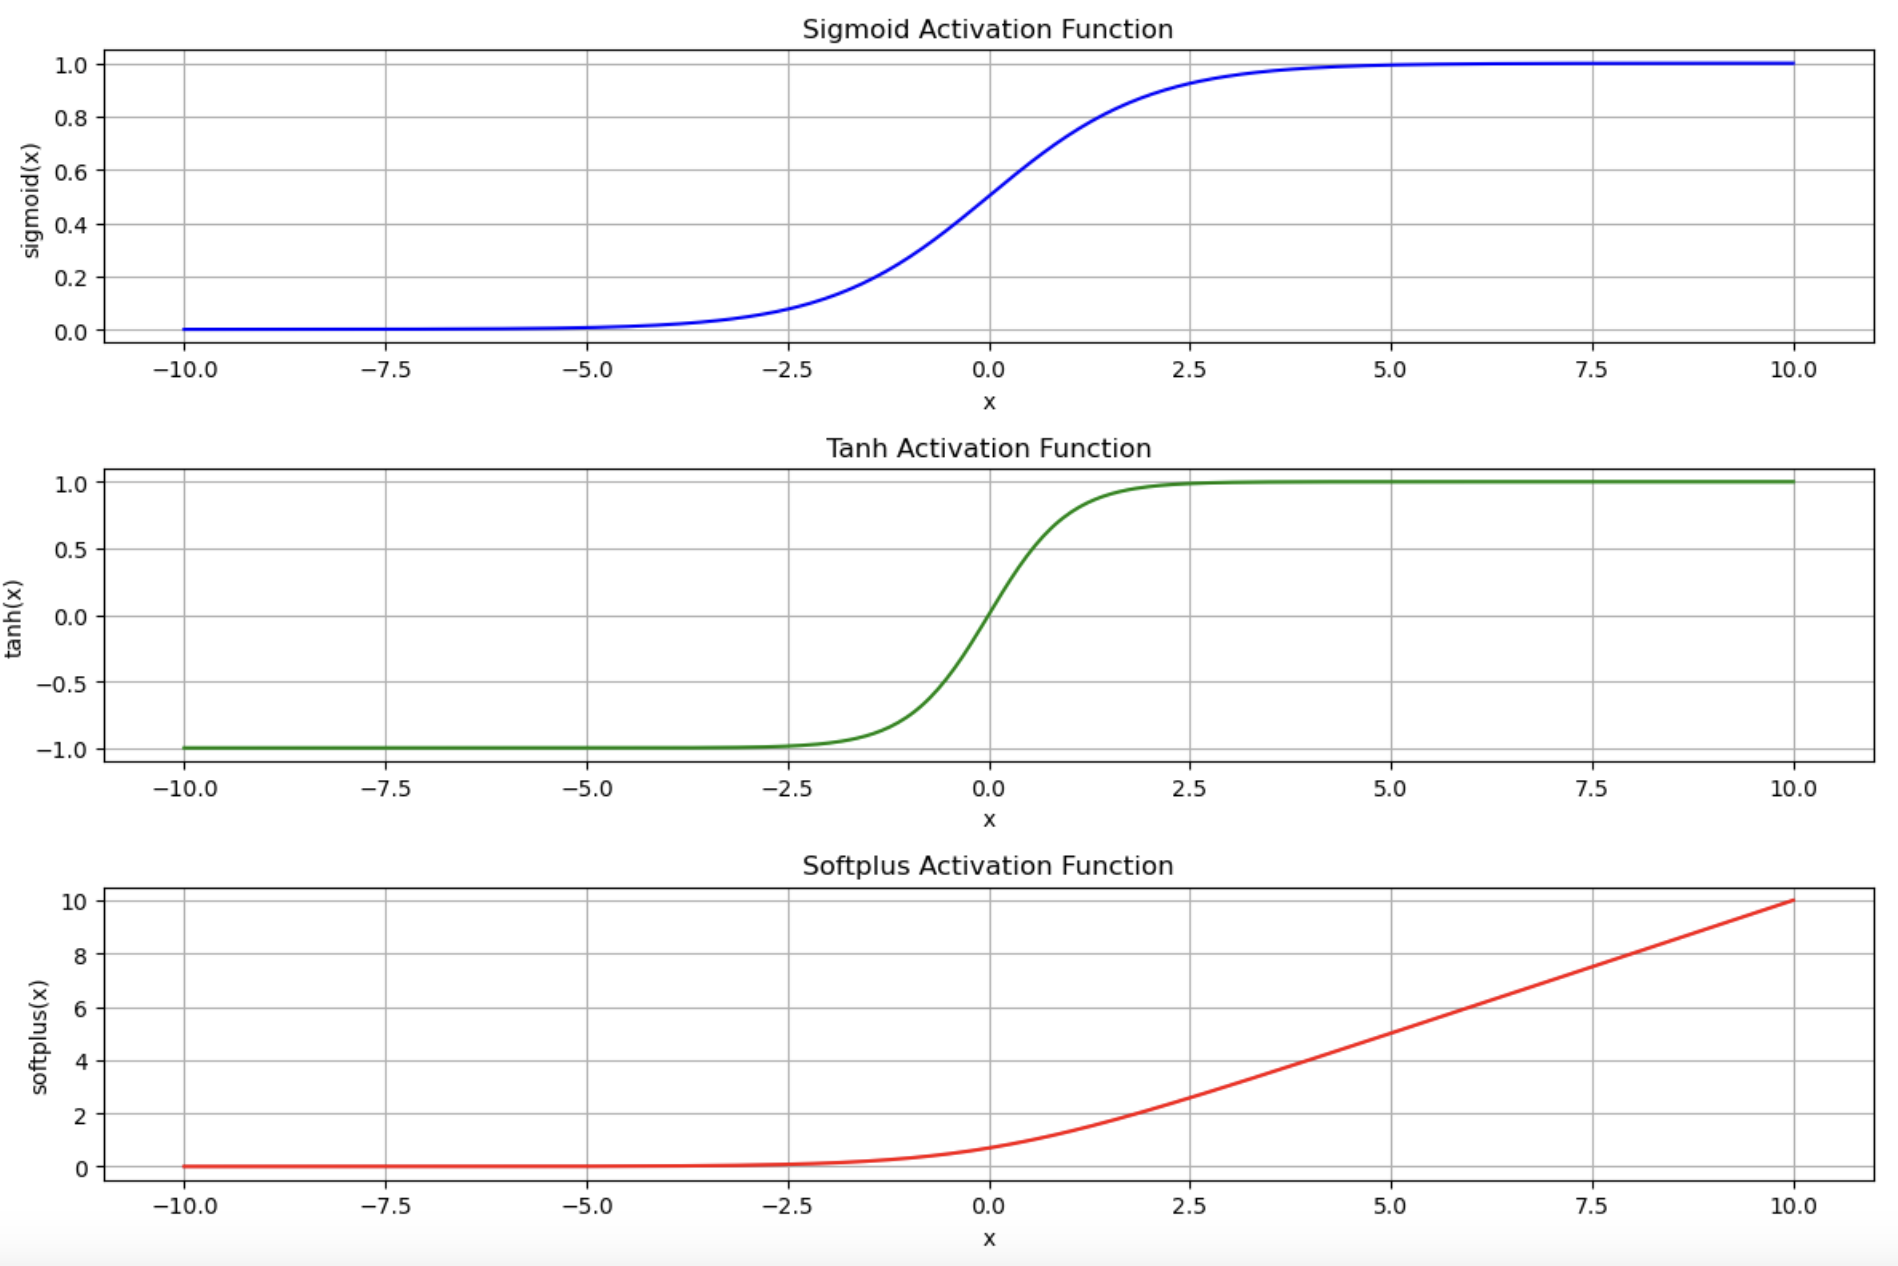

Q8 (10 points) List all hyperparameters discussed in the class related to Artificial and Deep Neural Networks and explain the role/impact of each hyperparameter. Which technique(s) can be used to perform hyperparameter tuning? Explain how the technique(s) work. 
--
**Activation function**
Role: Determines the type of transformation applied to the input of each neuron in the network. Common activation functions include sigmoid, tanh, ReLU, Leaky ReLU, etc.... Each function has different characteristics:
Sigmoid and tanh work for small networks but can cause vanishing gradients in deep networks.
ReLU is also commonly used in deep learning due to faster convergence and non-saturating behavior.
The choice of activation function affects the model's ability to capture complex patterns. ReLU, for instance, improved training speed but can suffer from the "dying ReLU problem", where some neurons output zero for all inputs.


**Learning rate value**
Determines the size of the steps taken in the direction of the gradient during weight updates. Typical values range from 0.001 to 0.1, depending on the problem. A high learning rate can lead to faster convergence but may overshoot the optimal solution, while a low rate may lead to slow training or getting stuck in local minima.


**Number of epochs** 
(1 Epoch means when the whole training data is passed forward and backward through the neural
network only once) Refers to the total number of times the training data passes through the entire network. More epochs allow the model to learn better but increase the risk of overfitting if set too high. If too low, the model may underfit.

**Batch size**
 Specifies the number of samples processed before updating the model’s parameters. Typical values are powers of two (e.g., 32, 64, 128).
 Larger batch sizes can speed up training and lead to smoother gradient estimates, while smaller batch sizes provide more generalization but increase training time and variance.


**Number of hidden layers**
 The number of hidden layers determines the depth of the neural network.
 More hidden layers allow the network to learn more complex representations but increase computational cost. Deep networks are better for complex problems, though they are more prone to overfitting.


**Number of neurons at each hidden layer**
 Defines the width of each hidden layer, impacting the model's capacity.
More neurons provide greater capacity to learn features but increase the risk of overfitting. If too few, the model may underfit.

**Momentum term value**
Helps accelerate gradient descent by adding a fraction of the previous gradient update to the current update. Common values range from 0.5 to 0.9. Increases convergence speed and helps the model escape shallow minima. A higher momentum can cause oscillations, while too low may slow down training.


**Hidden layer activation function**
Controls the non-linearity applied in hidden layers, similar to the activation function discussed above. However, the hidden layer activation function is often specifically optimized for deeper layers (e.g., ReLU).
The activation function choice in hidden layers directly affects the network's ability to learn complex patterns.

**Regularization Parameter value**
Regularization methods like L2 (weight decay), L1 regularization, or dropout require a parameter to control the extent of regularization. A high regularization parameter reduces overfitting by penalizing large weights or randomly dropping nodes. If set too high, it can cause underfitting.

Hyperparameter tuning techniques
---

 **Manual Search** Run controlled experiemnts, where each experiment is a combination of hyperparameter values. Keep all but one parameter active, then analyze the effect and make your decision on which hyperparameter to change next, repeatng as necessary. Howeever, each experiment means training the model end-to-end, which is a very slow, especially for deep learning algorithms like CNNs.

 **Grid Search** systematically explores a defined grid of hyperparameters. The performance of the model on each combination of hyperparameters on a validation set is then evaluated. Hyperparameters resulting in teh best performance on the validation set are then chosen as the optimal hyperparameters. Model is trained on the training set w/ a specific set of hyperparameers, and the performance fo the model is evaluated on the validation set. This process is repeated for each combination of hyperparameters in the grid, and the best performing combination is selected. It's an automated "trial-and-error" process to selecte hyperparameters for the most accurate model. 

 **Bayesian Optimization** builds a probabilistic model of the function that maps hyperparameters to model performance and iteratively selects the most promising hyperparameters based on this model. More efficient than grid search; ideal for high-dimensional spaces and complex models. Complex to implement and computationally intensive.


**Cross-Validation Grid Search** is an exhaustive search method where all possible combinations of specified hyperparameter values are evaluated using cross-validation. Each combination of hyperparameters is validated using a cross-validation approach, typically k-fold cross-validation, which splits the dataset into k subsets, training on k-1 of them and validating on the remaining one, rotating each subset as the validation set once. Computationally expensive. 

 **Random Search** randomly samples hyperparameter combinations instead of exhaustively searching all possible combinations. It defines a search space and randomly selects values for each hyperparameter within that space.Efficient for high-dimensional hyperparameter spaces since it doesn’t evaluate every combination. No guarantee of finding the absolute best hyperparameters.

 
 **Bayesian Optimization** uses a probabilistic model to map hyperparameters to a performance measure based on past evaluations of the model. It iteratively updates its knowledge of hyperparameters and uses this model to decide which set of hyperparameters to evaluate next. Converges on a good solution faster than grid or random search, but complicated to implment.

**Hyperband** is an adaptive resource allocation and early-stopping approach, based on principles of successive halving. Poorly performing configurations are halted early, making it faster than grid or random search since it doesn’t evaluate all configurations fully.



Q9 (20 points) Given a dataset with input attributes x1 and x2, and output variable y, you are training a 3 layer neural network. Assume that activation function used in each layer is sigmoid. Mathematically describe one feed-forward pass followed by one backward-pass in terms of updating the weights of each layer in this neural network. 
--
The number of hidden layer neurons is unknown in this formulation and there is only one output neuron. 

### Feed-Forward Pass
$i$: $i^{th}$ neuron's output in the input layer
$j$: $j^{th}$ neuron's output in the hidden layer
$y$: output neuron's output

$b_j$: biases in the hidden layer
$b_k$: biases in the output layer

$x_i$: data coming from the input layer
$w_{ij}$: weights connecting input to hidden layer
$w_{jk}$: weights connecting hidden to output layer

$z_j$: biases in the hidden layer
$z_k$: biases in the output layer

**First Layer (Input -> Hidden 1):**
   $$
   z_{j} = w_{ij} \cdot x_i + b_j = \sum_i w_{ij} x_i + b_j
   $$
   $$
   a_1 = \sigma(z_j)
   $$

**Second Layer (Hidden 1 -> Output):**
   $$
   z_{k} = w_{ij} \cdot \sigma(z_j)+ b_k
   $$
   $$
   a_k = \sigma {z_k} = \hat{y} = \sigma(z_k) = \sigma (w_{jk} \sigma (w_{ij}x_i + b_j) + b_k)
   $$



### Backward Pass (Using Gradient Descent)

Define the loss function $ E_n(w) = \frac{1}{2} \sum_k(\hat{y} - y)^2 $. Then, calculate the gradient of the loss function with respect to each layer's weights and biases to update them to make them more accurate.

1. **Output Layer Gradients:**
  $$
   \Delta w = \frac{\partial E_n(w)}{\partial w_{jk}} = \frac{\partial E_n(w)}{\partial a_{k}} \times \frac{\partial a_k}{\partial z_k} \times \frac{\partial z_k}{\partial w_{jk}}
   $$
Using the chain rule:
   $$
   \frac{\partial E_n(w)}{\partial w_{jk}} = (y - \hat{y})\times \frac{\partial a_k}{\partial z_k} \times \frac{\partial z_k}{\partial w_{jk}}  = (y - \hat{y})\times (\sigma(z_k)(1-\sigma (z_k)) \times \frac{\partial z_k}{\partial w_{jk}}
   $$
    remember...
   $\hat{y} = \sigma(z_k)$, $z_k = w_{jk} \sigma z_j + b_k$, and $z_j = w_{ij}x_i + b_j$

   and derivative of sigmoid function:
   $$
   \frac{\partial \sigma (x)}{\partial x} = \sigma(x) (1- \sigma (x))
   $$
   $$
   Sigmoid = \sigma (x) = 1/(1+e^{-x})
   $$
3. **Hidden Layer Gradients:**
4. 
    $$
   \Delta w = \frac{\partial E_n(w)}{\partial w_{ij}} = \frac{\partial E_n(w)}{\partial a_{k}} \times \frac{\partial a_k}{\partial z_k} \times \frac{\partial z_k}{\partial a_j} \times \frac{\partial a_j}{\partial z_j} \times \frac{\partial z_j}{\partial w_{ij}}
   $$
   
Using the chain rule:

   $$
   \frac{\partial E_n(w)}{\partial w_{ij}} = (y - \hat{y})\times \frac{\partial a_k}{\partial z_k} \times \frac{\partial z_k}{\partial a_j}\times \frac{\partial a_j}{\partial z_j} \times \frac{\partial z_j}{\partial w_{ij}}  = (y - \hat{y})\times (\sigma(z_k)(1-\sigma (z_k)) \times \frac{\partial z_k}{\partial a_j}\times \frac{\partial a_j}{\partial z_j} \times \frac{\partial z_j}{\partial w_{ij}}
   $$


### Weight and Bias Updates

Using a learning rate $ \alpha $, update each layer’s weights and biases:
$$
W_{jk} := W_{jk} - \alpha \frac{\partial  E_n(w)}{\partial W_{jk}}
$$
$$
W_{ij} := W_{ij} - \alpha \frac{\partial  E_n(w)}{\partial W_{ij}}
$$


Q10 (14 points) In this exercise, use the output information generated by this code to perform a comparative study of the performance (i.e., loss , Accuracy) of the neural networks models based on the hyperparameters used. Generate a table to report your analysis.
Note: If you want to run this code and have trouble with imported libraries, try 'pip install keras==2.12.0'
--

In [3]:
!pip install keras==2.12.0
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define create_model function for KerasClassifier
def create_model(num_layers=1, num_neurons=64, activation='relu', dropout_rate=0.0, momentum=0.9):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_scaled.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define parameters grid for grid search
param_grid = {
    'num_layers': [3],
    'num_neurons': [32, 64],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.5],
    'momentum': [0.5, 0.9]
}

# Create KerasClassifier wrapper for scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Perform grid search with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_scaled, y)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))


Epoch 1/10


/var/folders/vs/jrvxkfl12xg2pqv0j17w8bsr0000gn/T/ipykernel_23640/4219747616.py:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)


45/45 [==============================] - 0s 520us/step - loss: 2.3206 - accuracy: 0.1343
Epoch 2/10
45/45 [==============================] - 0s 430us/step - loss: 2.0480 - accuracy: 0.2749
Epoch 3/10
45/45 [==============================] - 0s 427us/step - loss: 1.8404 - accuracy: 0.3820
Epoch 4/10
45/45 [==============================] - 0s 470us/step - loss: 1.6942 - accuracy: 0.4280
Epoch 5/10
45/45 [==============================] - 0s 417us/step - loss: 1.5364 - accuracy: 0.4920
Epoch 6/10
45/45 [==============================] - 0s 415us/step - loss: 1.3714 - accuracy: 0.5665
Epoch 7/10
45/45 [==============================] - 0s 432us/step - loss: 1.2539 - accuracy: 0.6068
Epoch 8/10
45/45 [==============================] - 0s 454us/step - loss: 1.1114 - accuracy: 0.6340
Epoch 9/10
45/45 [==============================] - 0s 422us/step - loss: 1.0363 - accuracy: 0.6701
Epoch 10/10
12/12 [==============================] - 0s 358us/step
Epoch 1/10
45/45 [==========================

Based on accuracy, the model with the parameters of {'activation': 'relu', 'dropout_rate': 0.2, 'momentum': 0.9, 'num_layers': 3, 'num_neurons': 64} is the best, with 0.962711 accuracy. However, it is only the second most consistent, with the  standard deviation of 0.007818. The most consistent model ekes it out with an accuracy std. of 0.007412 and an accuracy of 0.962153. Its parameters are {'activation': 'tanh', 'dropout_rate': 0.2, 'momentum': 0.9, 'num_layers': 3, 'num_neurons': 64}-- very similar, just with a differing activation function. The "best model" between these two depends on use case, as while both are very good, one is more accurate and the other is more consistent.

In [11]:
results_df = pd.DataFrame(grid_result.cv_results_)

# Select relevant columns (you can adjust this based on what you need)
results_df = results_df[['param_num_layers', 'param_num_neurons', 'param_activation', 
                         'param_dropout_rate', 'param_momentum', 
                         'mean_test_score', 'std_test_score']]

# Rename columns for clarity
results_df.columns = ['Num Layers', 'Num Neurons', 'Activation', 'Dropout Rate', 
                      'Momentum', 'Mean Accuracy', 'Std Accuracy']

# Display the DataFrame
print(results_df)

   Num Layers Num Neurons Activation Dropout Rate Momentum  Mean Accuracy  \
0           3          32       relu          0.2      0.5       0.861427   
1           3          64       relu          0.2      0.5       0.908731   
2           3          32       relu          0.2      0.9       0.954362   
3           3          64       relu          0.2      0.9       0.962711   
4           3          32       relu          0.5      0.5       0.602129   
5           3          64       relu          0.5      0.5       0.833592   
6           3          32       relu          0.5      0.9       0.892035   
7           3          64       relu          0.5      0.9       0.938223   
8           3          32       tanh          0.2      0.5       0.903154   
9           3          64       tanh          0.2      0.5       0.940455   
10          3          32       tanh          0.2      0.9       0.956589   
11          3          64       tanh          0.2      0.9       0.962153   